# Simulate Microcircuitry

This example uses the microcircuitry created in ```CreateMicrocircuitry.ipynb```.

Here we setup input, and run a small simulation, then plot the results.

In [1]:
import os

network_path = os.path.join("networks", "example_microcircuit")
network_file = os.path.join(network_path, "network-synapses.hdf5")

duration = 0.5
n_cores = 6

## Generate input

The input to the neurons is defined in ```example_input.json```. Each neuron will check the config file to see what input block applies to it, the order of specificity is: neuron_id, neuron_name, neuron_type (e.g. "7", "dSPN_1", "dSPN" -- note that json only support strings so we have to convert neuron_id to a string before checking). If an input block is specified for the neuron_id then that is used, the others are ignored.

The ```start```, ```end```, ```frequency``` variables can be scalars, or vectors (if you want to define multiple inputs). The ```modFile``` specifies which NEURON mod file is responsible for modelling the channel.

In [ ]:
from snudda.input import SnuddaInput
si = SnuddaInput(network_path=network_path,
                 hdf5_network_file=network_path,
                 input_config_file="example_input.json",
                 verbose=False)
si.generate()

## Plot input spikes

In [ ]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, network_path=network_path)
spi.plot_input(neuron_type="FS", num_neurons=3)
spi.plot_input(neuron_type="dSPN", num_neurons=2)
spi.plot_input(neuron_type="iSPN", num_neurons=2)

## Simulate network

In [ ]:
os.system(f"mpiexec -n {n_cores} snudda simulate {network_path} --time {duration}")

## Plot

In [2]:
from snudda.utils import SnuddaLoad
from snudda.utils import SnuddaLoadNetworkSimulation

sl = SnuddaLoad(network_path)

sim_file = os.path.join(network_path, "simulation", "output.hdf5")
network_file = os.path.join(network_path, "network-synapses.hdf5")

sls = SnuddaLoadNetworkSimulation(network_simulation_output_file=sim_file)

n_centre=5

nid_fs = [x for x,y in sl.get_centre_neurons_iterator(n_neurons=n_centre, neuron_type="FS")]
nid_dspn = [x for x,y in sl.get_centre_neurons_iterator(n_neurons=n_centre, neuron_type="dSPN")]
nid_ispn = [x for x,y in sl.get_centre_neurons_iterator(n_neurons=n_centre, neuron_type="iSPN")]

Loading 405 neurons with 68677 synapses and 0 gap junctions
Loading networks/example_microcircuit/simulation/output.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
10: (iSPN_3, default, )
39: (iSPN_3, default, )
48: (iSPN_3, default, )
69: (iSPN_3, default, )
71: (iSPN_3, default, )
107: (iSPN_3, default, )
130: (iSPN_3, default, )
143: (iSPN_3, default, )
144: (iSPN_3, default, )
222: (iSPN_3, default, )
261: (iSPN_3, default, )
340: (iSPN_3, default, )
344: (iSPN_3, default, )
368: (iSPN_3, default, )
374: (iSPN_3, default, )
382: (iSPN_3, default, )


Loading network info from networks/example_microcircuit/network-synapses.hdf5
Loading 405 neurons with 68677 synapses and 0 gap junctions
Loading input info from networks/example_microcircuit/input-spikes.hdf5
Loading networks/example_microcircuit/simulation/output.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
10: (iSPN_3, default, )
39: (iSPN_3, default, )
48: (iSPN_3, default, )
69: (iSPN_3, default, )
71: (iSPN_3, default, )
107: (iSPN_3, default, )
130: (iSPN_3, default, )
143: (iSPN_3, default, )
144: (iSPN_3, default, )
222: (iSPN_3, default, )
261: (iSPN_3, default, )
340: (iSPN_3, default, )
344: (iSPN_3, default, )
368: (iSPN_3, default, )
374: (iSPN_3, default, )
382: (iSPN_3, default, )
Plotting traces: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58

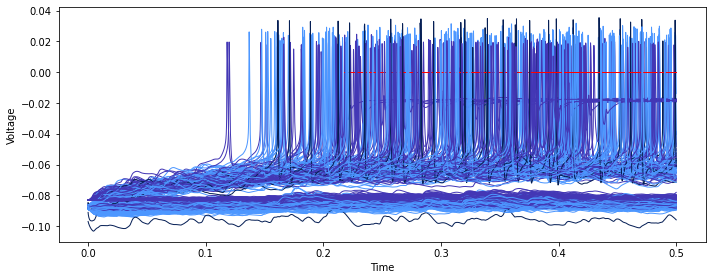

In [3]:
%matplotlib inline

from snudda.plotting.plot_traces import PlotTraces
pt = PlotTraces(output_file=sim_file, network_file=network_file)
# Use trace_id to specify which traces
ax = pt.plot_traces(offset=0, time_range=(0,0.5),fig_size=(10,4))

Saving figure to networks/example_microcircuit/figures/spike-raster.png


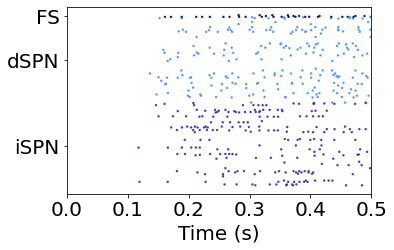

In [4]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,0.5)
spr = SnuddaPlotSpikeRaster2(network_path=network_path,
                             network_file=network_file,
                             simulation_file=sim_file,
                             snudda_load=sl, snudda_simulation_load=sls)

spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

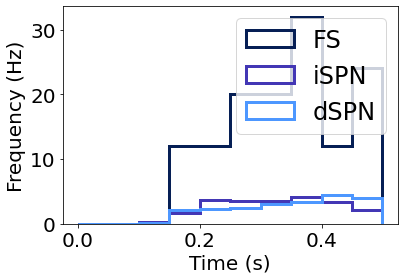

<AxesSubplot:xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [5]:
spr.plot_spike_histogram_type(neuron_type=["dSPN", "iSPN", "FS"])